## Importando bibliotecas

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

## Baixando os dados do dataset

In [9]:
# carregar base de dados
file_path = "Churn_Modelling.csv"
bank_data = pd.read_csv(file_path)

# Verificar 5 primeiras linhas
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
print(bank_data.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

### Verificar Linearidade entre Variáveis Independentes e o Logit

In [11]:
# Definir variável dependente e independentes
X = bank_data.drop(columns=['Exited'])  # Exemplo: 'Exited' é a variável alvo
y = bank_data['Exited']  # Variável dependente

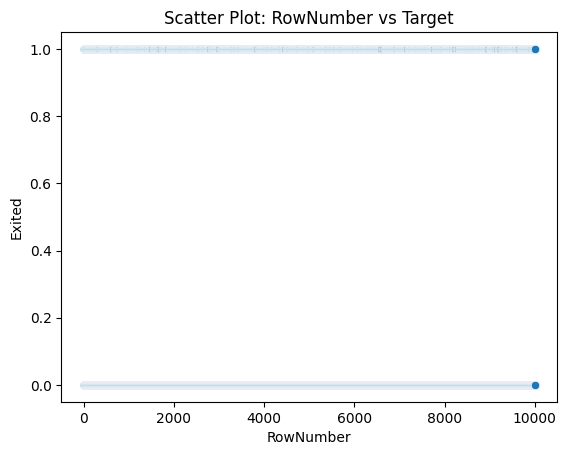

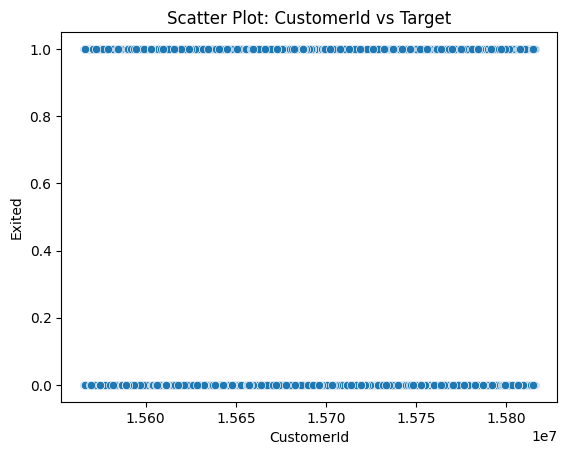

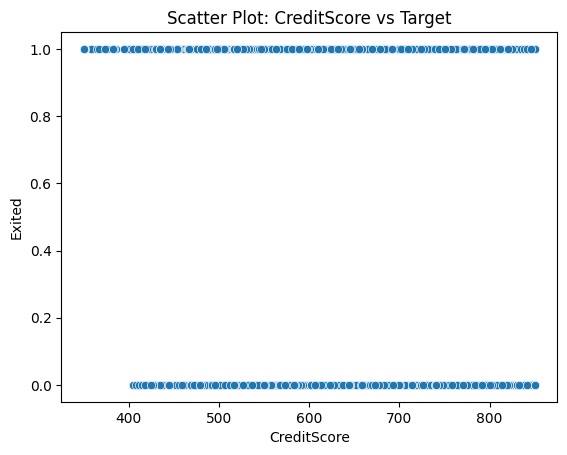

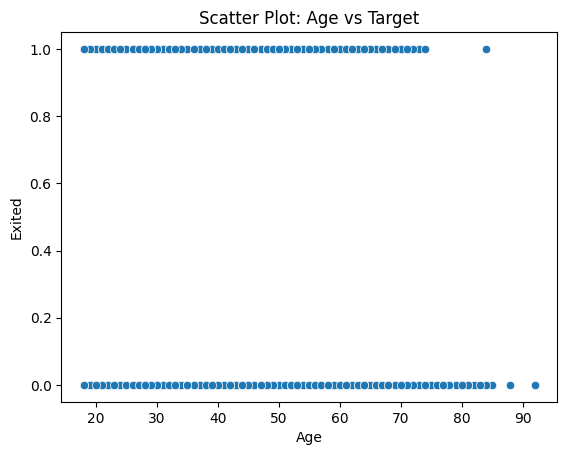

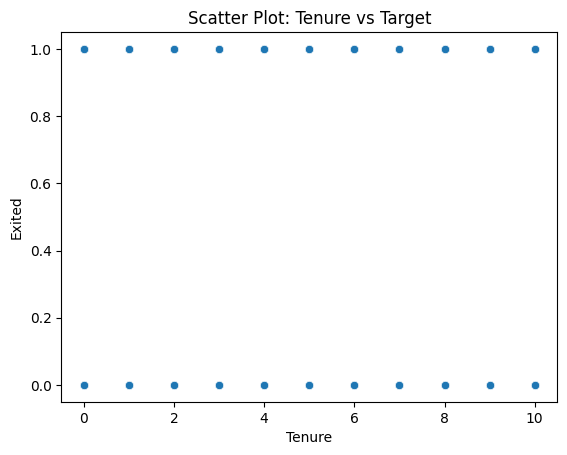

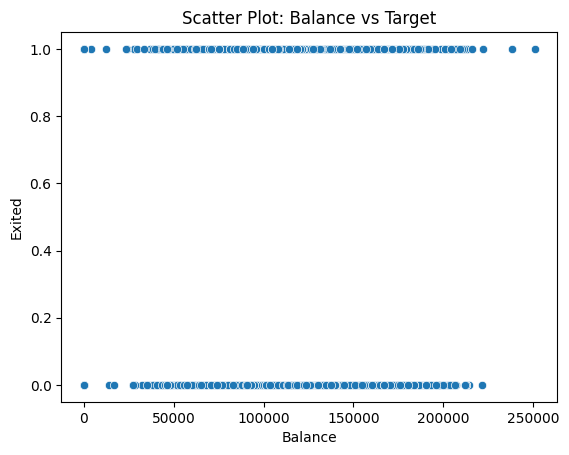

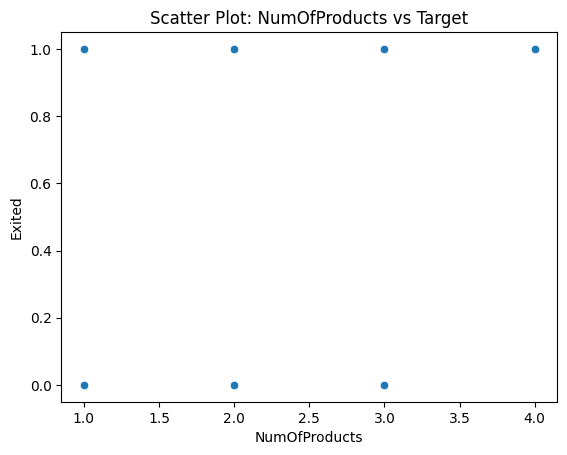

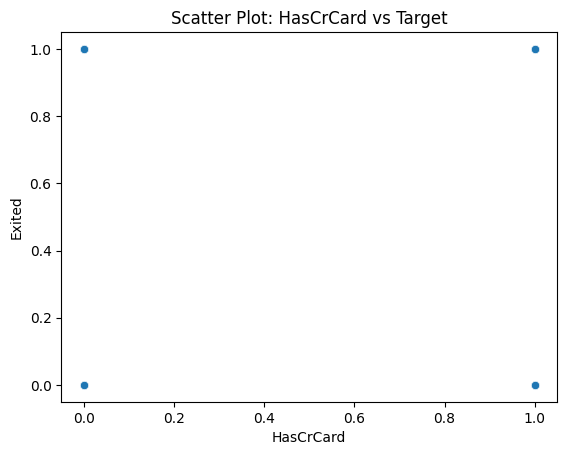

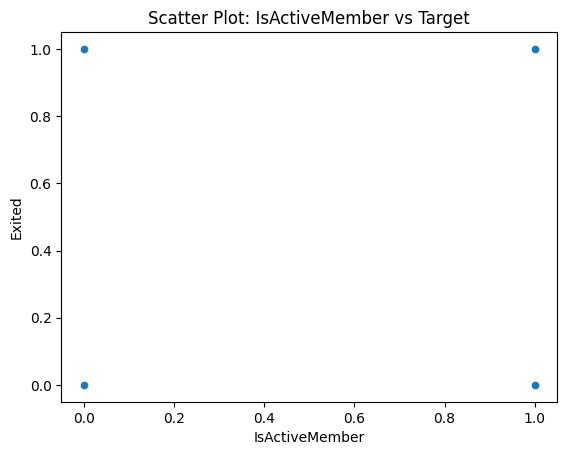

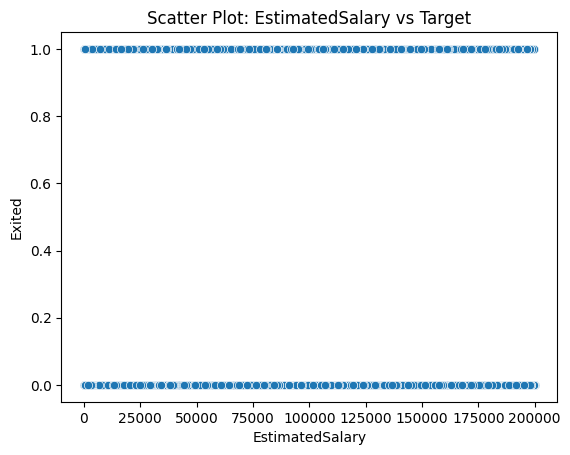

In [12]:
from statsmodels.api import Logit
import matplotlib.pyplot as plt

# Calcular correlação de cada variável independente com o logit
for col in X.select_dtypes(include=[np.number]).columns:  # Somente variáveis numéricas
    sns.scatterplot(x=X[col], y=y)
    plt.title(f"Scatter Plot: {col} vs Target")
    plt.show()

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


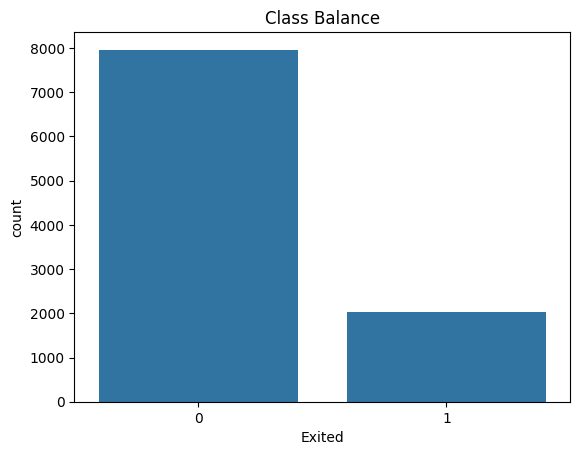

In [16]:
# Verificar distribuição da variável alvo
print(y.value_counts(normalize=True))

# Visualizar com gráfico
sns.countplot(x=y)
plt.title("Class Balance")
plt.show()

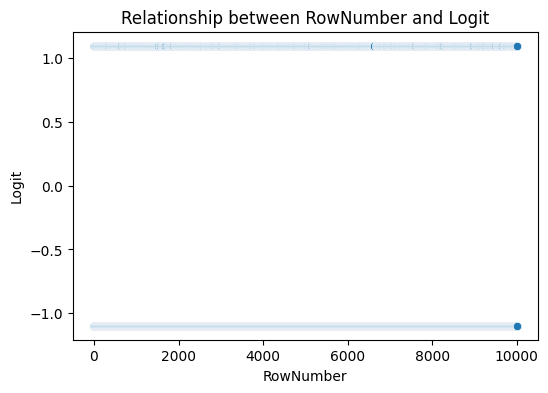

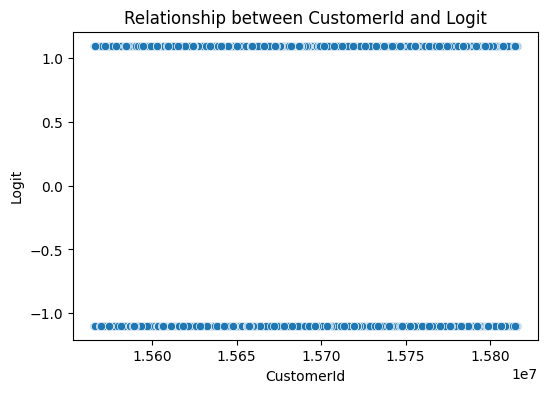

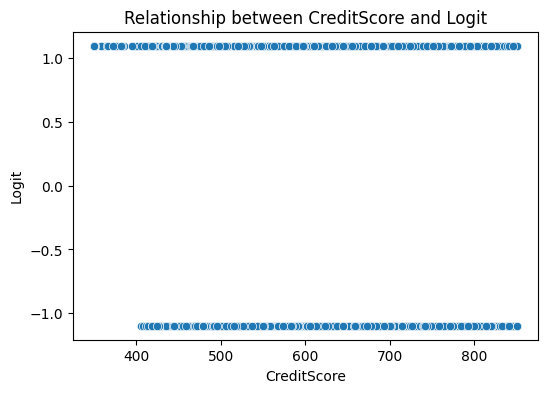

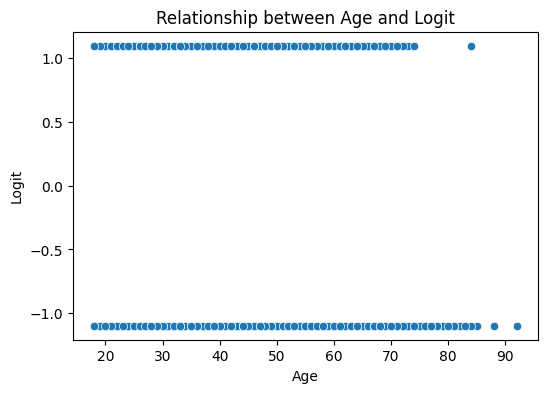

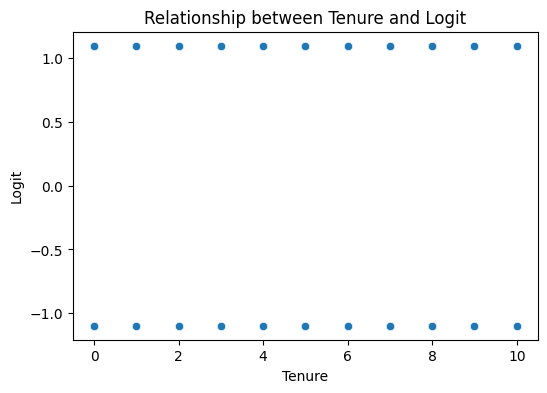

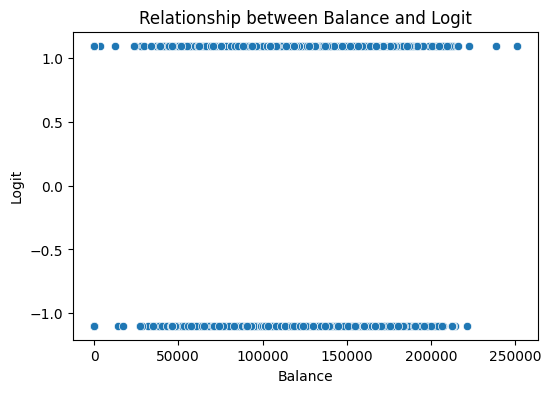

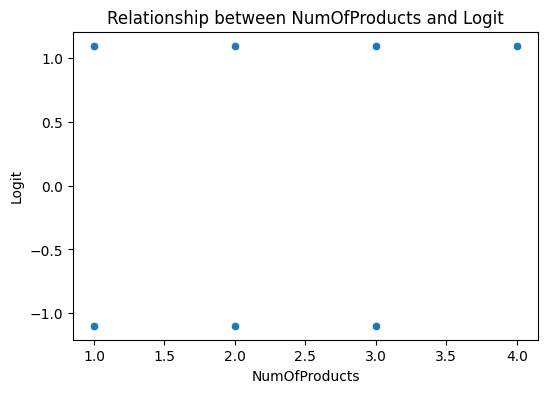

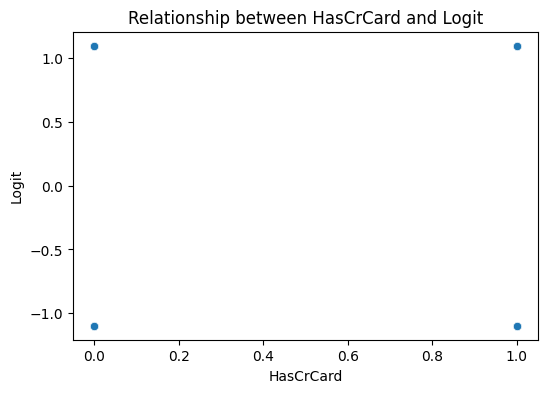

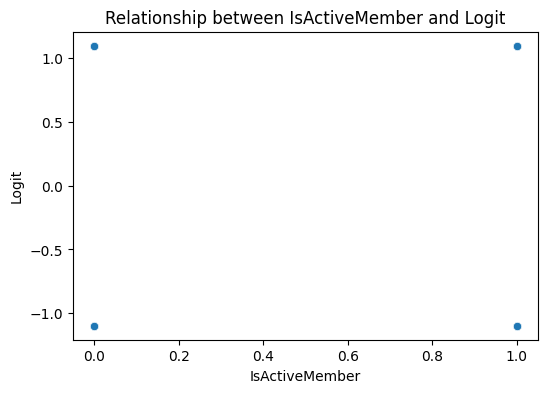

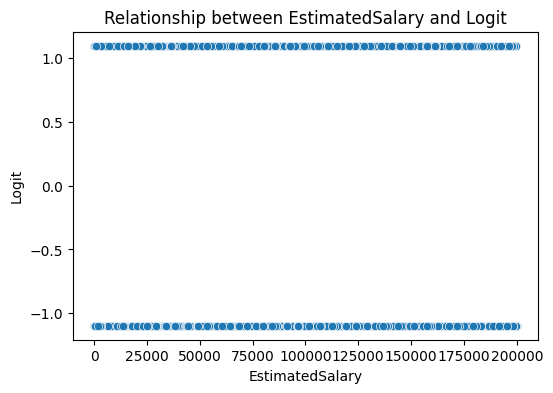

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Transformar variável dependente em probabilidade aproximada
y_logit = np.log((y + 0.5) / (1 - y + 0.5))  # Adiciona 0.5 para evitar divisão por zero

# Criar gráficos de dispersão entre cada variável independente e o logit
for col in X.select_dtypes(include=[np.number]).columns:  # Somente variáveis numéricas
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[col], y=y_logit)
    plt.title(f"Relationship between {col} and Logit")
    plt.xlabel(col)
    plt.ylabel("Logit")
    plt.show()